<a href="https://colab.research.google.com/github/Avinash-Saudagar/AirBnb-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Exploratory Data Analysis on NYC Airbnb 2019 dataset**

## Airbnb was conceived years ago by two roommates who rented out an air mattress in their living room. This turned their whole apartment into a bed and breakfast. This was done to sustain the high-priced living in San Francisco. This gave the company its name Airbedandbreakfast.This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. Airbnb was started in 2008.Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

# **Data Source**

# **Acquaring and Loading Data**

In [ ]:
#importing necessery libraries for future analysis of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#using pandas library and 'read_csv' function to read Airbnb NYC 2019 csv file

df_airbnb = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')
df_airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


# **Data Exploration and variable Identification**

In [ ]:
#checking info about dataset
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_airbnb.shape

(48895, 16)

This dataset has around **48895 observations** in it with **16 columns(features)** and it is a mix between categorical and numeric values.

# **Understadning Data**

**Finding numerical and categorical variables**

In [ ]:
#checking what are the variables here:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

By obsevations we get to that **'name'** column represents **property name** and and perticular properties were hosted by **perticular hosts** who are represented in **'host_name'** column.
But a particular host_name can have multiple properties in a area.
So **host_name** is like one of the **catogerical variable** like **neighbourhood(areas), neighbourhood_group, and room_type**.

In [ ]:
#let's proceed with examing some categorical unique values

#examining the unique values of neighbourhood_group 
df_airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#examining the unique values of neighbourhood
df_airbnb['neighbourhood'].nunique()

221

In [ ]:
#examining the unique values of room_type 
df_airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df_airbnb['host_id'].nunique()

37457

In [ ]:
df_airbnb['host_name'].nunique()

11452

In [ ]:
df_airbnb['name'].nunique()

47905

In [62]:
df_airbnb['name'].value_counts()
# few listings have no particular host name as below observation
# also few listings/property with same names has different hosts in different neighbourhoods of a neighbourhood_group

Hillside Hotel                         18
Home away from home                    17
New york Multi-unit building           16
unknown                                16
Brooklyn Apartment                     12
                                       ..
Beautiful Park Slope Brownstone         1
Cosy bedroom in Upper West Side         1
BK Private Room&Bath - comfortable!     1
Peaceful Private Space in Astoria       1
Large 2 bedroom, full floor apt.        1
Name: name, Length: 47906, dtype: int64

In [ ]:
df_airbnb[df_airbnb['name']=='New york Multi-unit building'].head(3) 
#same property but hosted by different Airbnb hosts with different room_types & varied price ranges

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2751,1489426,New york Multi-unit building,7964729,Justin,Manhattan,Financial District,40.70582,-74.00888,Entire home/apt,390,3,1,2018-09-13,0.1,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.1,1,179
33473,26463879,New york Multi-unit building,21682640,Clarise,Brooklyn,Flatbush,40.64258,-73.95952,Private room,65,30,0,NaN,NaN,2,365


In [ ]:
df_airbnb.loc[(df_airbnb['neighbourhood_group']=='Manhattan') & (df_airbnb['host_name']=='Natasha')]

#Same hosts have hosted for different properties in same neighbourhood groups

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4702,3304307,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,2019-06-01,1.05,1,219
4853,3458525,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,2019-06-19,1.05,2,211
8686,6673630,Stylish L.E.S Studio,6591262,Natasha,Manhattan,Lower East Side,40.71661,-73.98916,Entire home/apt,150,3,1,2015-08-01,0.02,1,0
9376,7193201,Private RM in Heart of East Village,33739627,Natasha,Manhattan,East Village,40.72896,-73.98430,Private room,99,1,4,2015-10-24,0.08,1,0
10310,7894907,Cosy studio in East Village,1830864,Natasha,Manhattan,East Village,40.72395,-73.98001,Entire home/apt,150,2,25,2016-07-22,0.55,1,0
11344,8813547,For Christmas-Large New 1 BR Near Central Park,30350590,Natasha,Manhattan,Theater District,40.76268,-73.98407,Private room,230,5,10,2016-09-10,0.23,1,0
20061,16066223,"Spacious, quiet 1 br apt in beautiful Inwood!",1713011,Natasha,Manhattan,Inwood,40.86757,-73.92699,Entire home/apt,89,14,14,2019-05-13,0.57,1,4
21145,16779705,Cozy West Village Studio,11699846,Natasha,Manhattan,Greenwich Village,40.73239,-73.99960,Entire home/apt,103,2,15,2018-10-28,0.57,1,0
22125,17808917,Gorgeous & Spacious UES apartment,85218001,Natasha,Manhattan,Upper East Side,40.77666,-73.95618,Private room,105,2,8,2018-06-16,0.30,1,0
24200,19499668,Cozy Sofa Bed in Upper Manhattan,3372118,Natasha,Manhattan,Washington Heights,40.84133,-73.93739,Shared room,50,1,21,2019-06-15,0.86,1,188


In [ ]:
# there are few listings where the property name and the host have same names

df_airbnb[df_airbnb['name']==df_airbnb['host_name']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365




A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

We'll not bother much as these are not that important in our analysis and proceed further

In [ ]:
# to find numerical veriables(overall summary)
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365** are numerical variables

In [ ]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So far we get to know that columns such as **'id' , 'last_review' are of no use for this prticular analysis**.To elaborate, "last_review" is 
date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. 
For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month.

In [ ]:
#dropping columns that are not significant
df_airbnb.drop(['id','last_review'], axis=1, inplace=True)

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0

df_airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df_airbnb.reviews_per_month.isnull().sum()

0

Also, **host_names and names are not that important in our analysis**, so atleast we are good to fill those with some substitutes in both the columns

In [ ]:
#filling these missing values in both with unknown & no_name respectively!

df_airbnb['name'].fillna('unknown',inplace=True)
df_airbnb['host_name'].fillna('no_name',inplace=True)

In [ ]:
#examing changes
df_airbnb.name.isnull().sum()

0

In [ ]:
#examing changes
df_airbnb.host_name.isnull().sum()

0

In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

# **Exploring and Visualizing Data**

if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
**neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews**
these are the important ones in our analysis. 

**Let's check the correlation matrix to understand how are the features corelated with each other.
Also to get an idea which are the most important features in this data.**

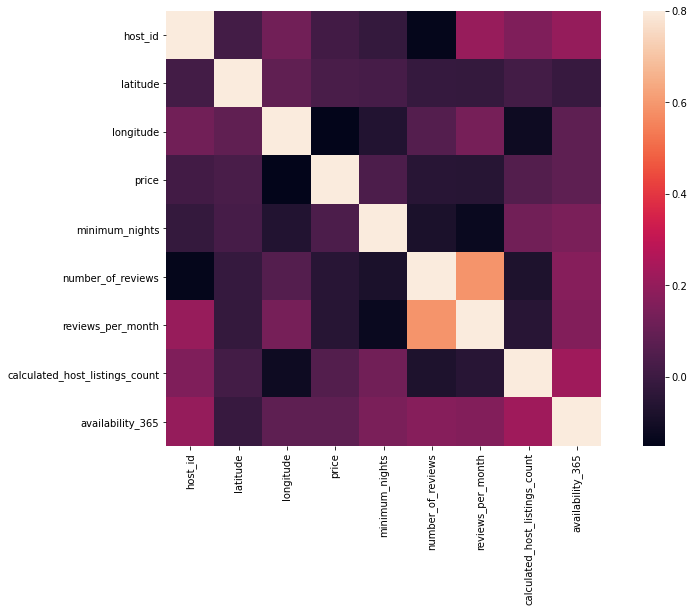

In [ ]:
#correlation matrix
plt.figure(figsize=(15,8))
corrmat = df_airbnb.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

From the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365. 
Also there's correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

# **Single Variable Analysis**

***1.top 10 hosts (IDs) have the most listings***

In [ ]:
#top 10 hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

top_host = df_airbnb.host_id.value_counts().head(10)
top_host.reset_index()

df_top_host = pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={'index':'host_id','host_id':'count'},inplace=True)
df_top_host


,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

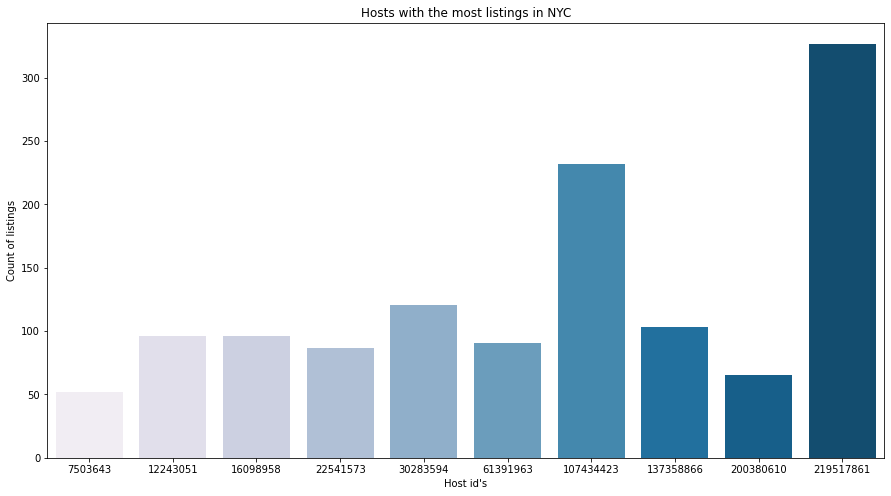

In [ ]:

plt.figure(figsize=(15,8))

viz=sns.barplot(x='host_id', y='count', data=df_top_host, palette="PuBu")
viz.set_title('Hosts with the most listings in NYC')
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host id\'s')
viz.set_xticklabels(viz.get_xticklabels())

***2.top 5 listings on Airbnb in entire NYC***

In [ ]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_airbnb['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,unknown,16
4,Brooklyn Apartment,12


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

***3.top 10 hosts on the basis of no of listings in entire NYC***

In [ ]:
top_10_hosts=df_airbnb['host_name'].value_counts()[:10]
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC')

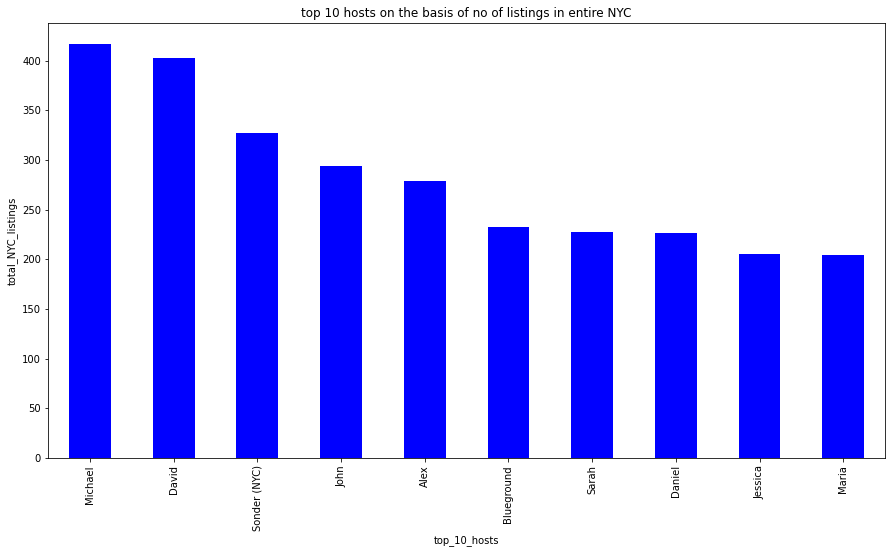

In [ ]:
plt.figure(figsize=(15,8))
top_10_hosts.plot(kind='bar',color='b')
plt.xlabel('top_10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC')

***4.the neighbourhood group vs no of listings in entire NYC***

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group')

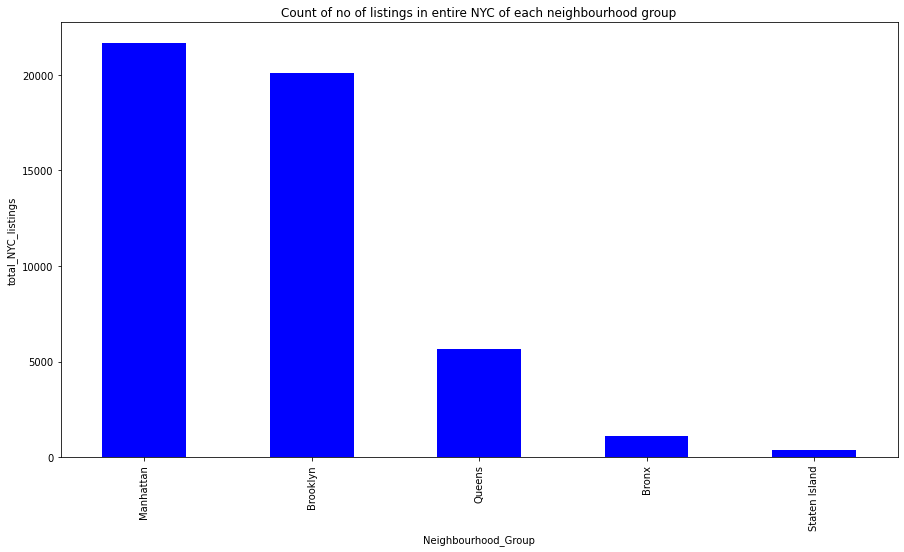

In [ ]:
plt.figure(figsize=(15,8))
df_airbnb['neighbourhood_group'].value_counts().plot(kind='bar',color='b')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group')

the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC

***5.Top 10 neighbourhoods groups in entire NYC on the basis of count of listings***

Text(0.5, 1.0, 'Top 10 neighbourhoods in entire NYC on the basis of count of listings')

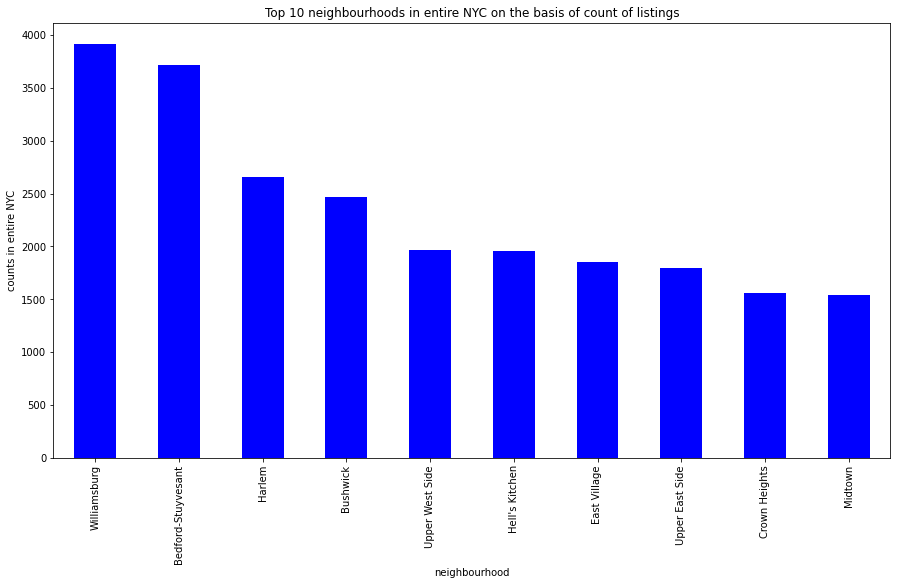

In [ ]:
plt.figure(figsize=(15,8))
top_10_neigbours= df_airbnb['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar',color='b')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top 10 neighbourhoods in entire NYC on the basis of count of listings')

***6.Top 10 reviewed hosts on the basis of reviews/month***

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['host_name','reviews_per_month','neighbourhood_group']]

,host_name,reviews_per_month,neighbourhood_group
42075,Row NYC,58.50,Manhattan
42076,Row NYC,27.95,Manhattan
38870,Louann,20.94,Queens
27287,Nalicia,19.75,Queens
28651,Nalicia,17.82,Queens
29628,Nalicia,16.81,Queens
20403,Danielle,16.22,Queens
22469,Danielle,16.03,Queens
36238,Brent,15.78,Queens
40297,Lakshmee,15.32,Queens


So, this are the listings with highest number of reviews, the highest being: Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

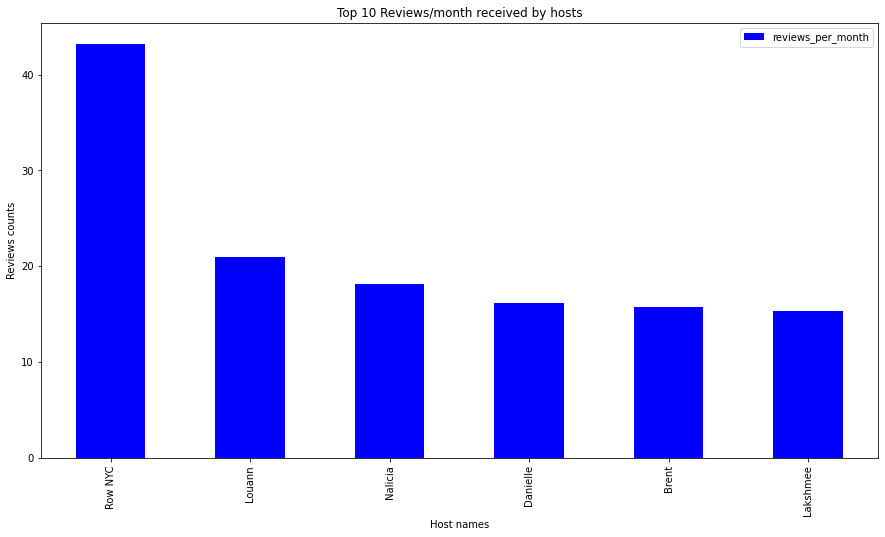

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='b')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average

***7.On an average for how many nights people stayed in each room_types***

Text(0, 0.5, 'Room types')

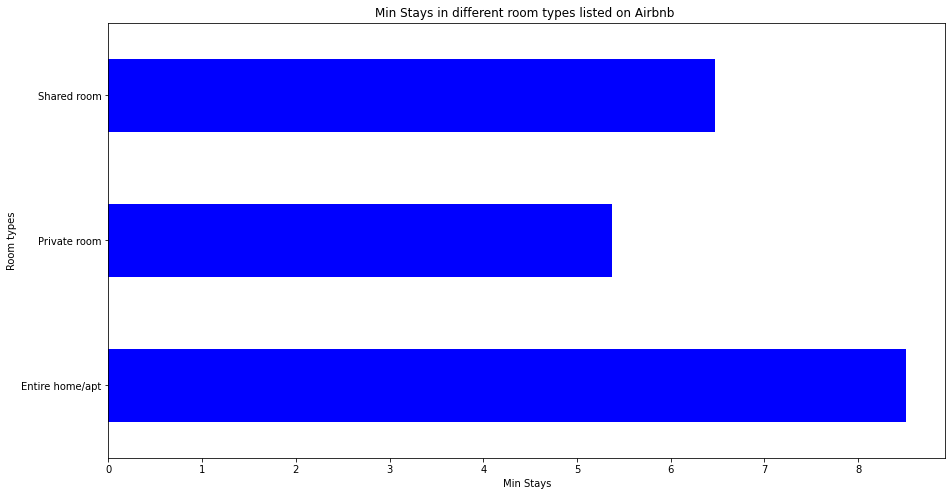

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
df_airbnb.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='b')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Min Stays')
plt.ylabel('Room types')


Looking at these it clearly indicates that people mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights.

# **Bi-varable Analysis**

***1.count of each room types in neighbourhood group entire NYC***

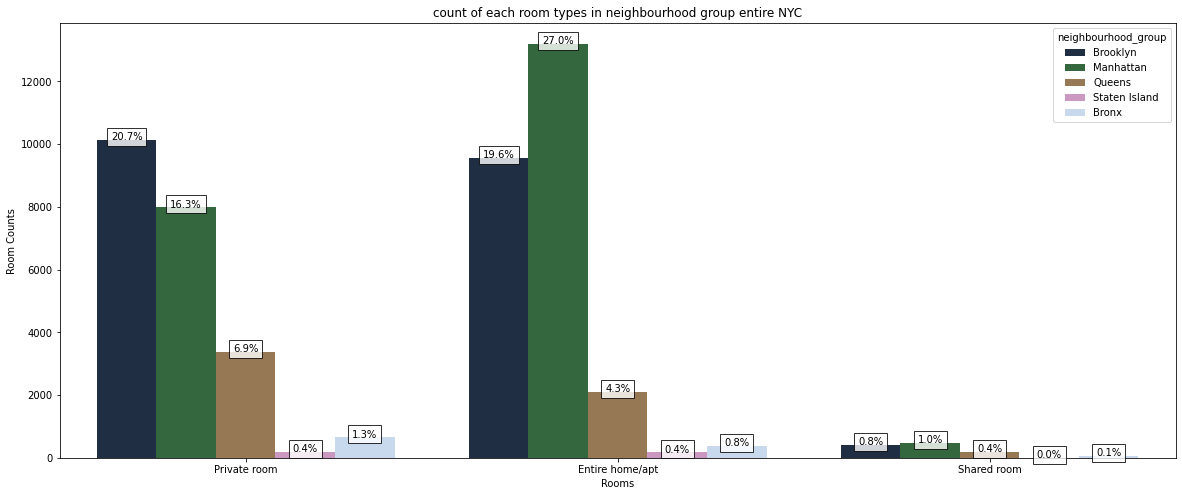

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=df_airbnb,palette='cubehelix')

total = len(df_airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x,y), ha = 'center',Bbox = dict(facecolor = 'white', alpha =.8))

plt.title('count of each room types in neighbourhood group entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=0)
plt.ylabel('Room Counts')

plt.show()

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

***2.count of each room types in top 10 neighbourhoods in entire NYC***

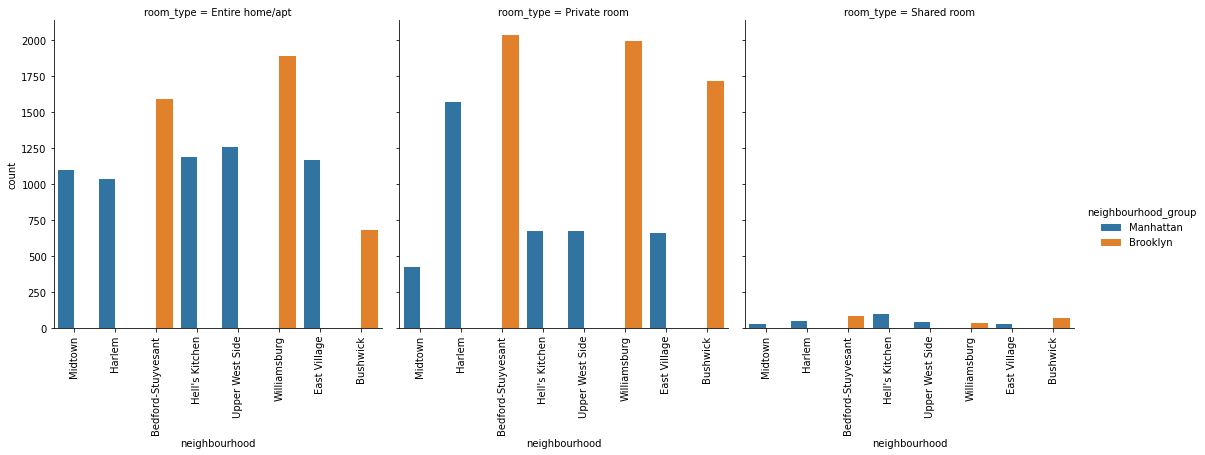

In [ ]:
#top 10 neighbourhoods roomtypes

sub_data = df_airbnb[df_airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem',
                                              'Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side''Crown Heights','Midtown'])]

viz3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_data , kind='count')
viz3.set_xticklabels(rotation=90)

People mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights

***3.monthly reviews varies with room types in each neighbourhood groups***

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','room_type' , 'reviews_per_month','neighbourhood_group']]

,name,room_type,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,Private room,58.50,Manhattan
42076,Great Room in the heart of Times Square!,Private room,27.95,Manhattan
38870,Lou's Palace-So much for so little,Private room,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,Private room,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,Private room,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,Private room,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Private room,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,Private room,16.03,Queens
36238,“For Heaven Cakes”,Entire home/apt,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,Private room,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

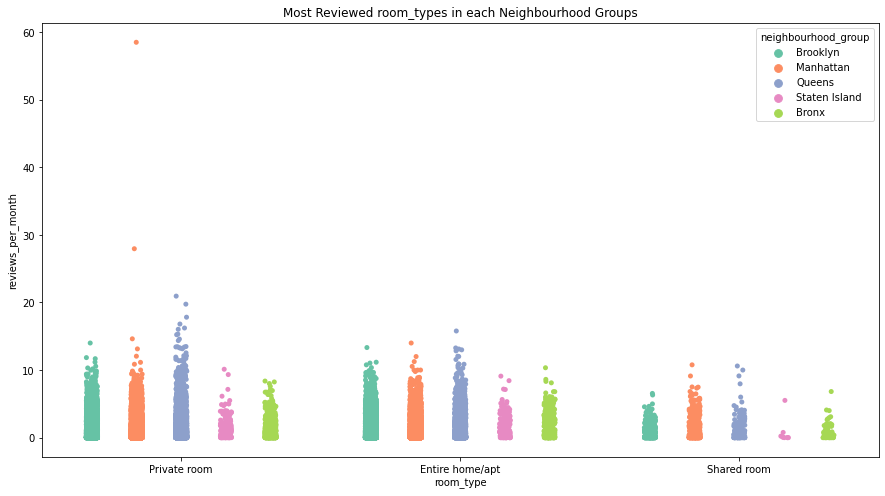

In [ ]:
f,ax = plt.subplots(figsize=(15,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_airbnb,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase.

Manhattan & Queens got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

***4.Hosts with most no of listings in NYC(on the basis of host listings count)***

In [ ]:
host_with_most_listings= df_airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(5,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216


Sonder(NYC) leads rooms in the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara.

***5.Room_types and their relation with availability and also with different neighbourhood groups***

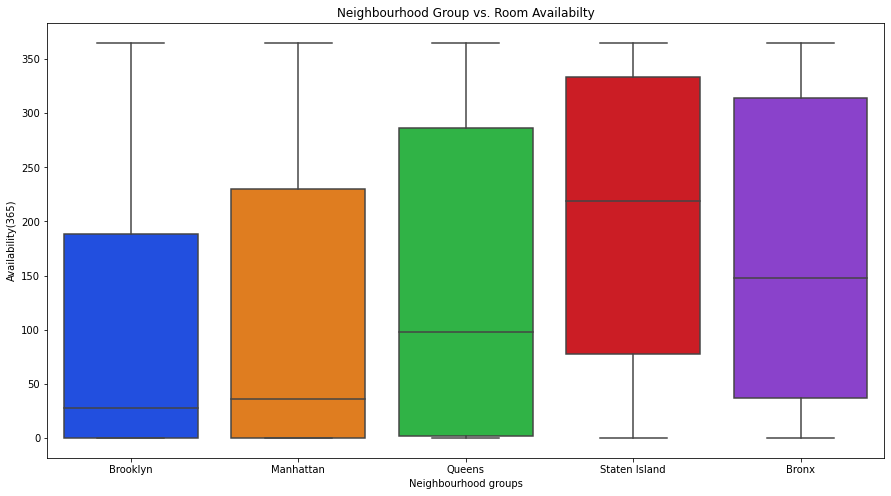

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.boxplot(x = 'neighbourhood_group', y= 'availability_365', data = df_airbnb, palette = "bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every yea

Text(0.5, 1.0, 'Room Location in neighbougherhood groups')

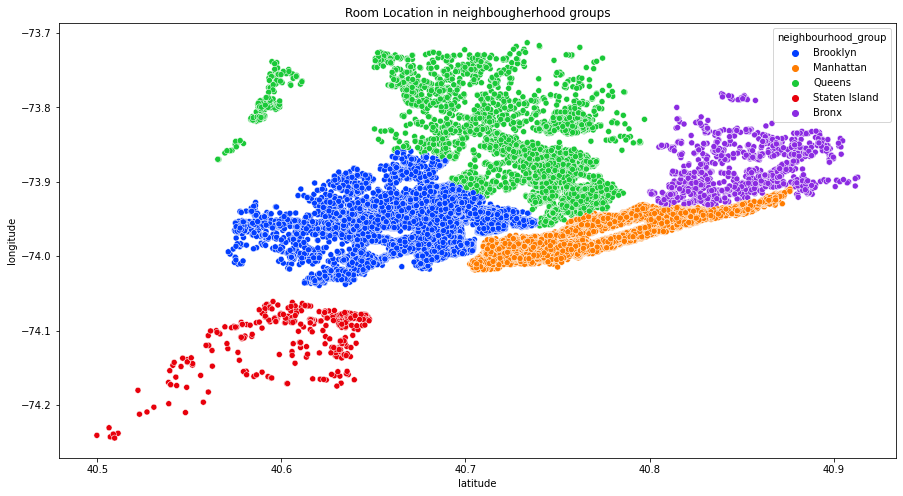

In [ ]:
# Room Location in neighbougherhood groups
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = 'latitude',y = 'longitude',data = df_airbnb, hue ='neighbourhood_group',palette='bright' )
ax.set_title('Room Location in neighbougherhood groups')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

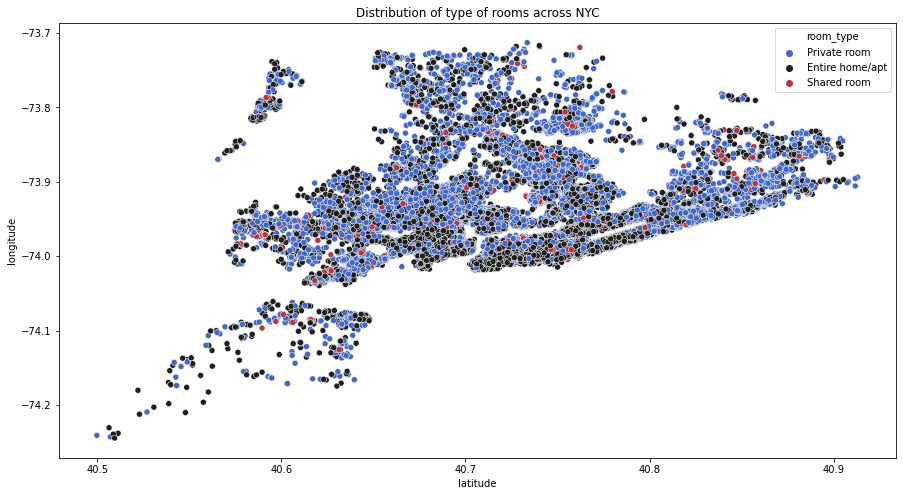

In [ ]:
# Distribution of type of rooms across NYC
plt.figure(figsize=(15,8))
ax =sns.scatterplot(x = df_airbnb['latitude'],y = df_airbnb['longitude'],hue = df_airbnb['room_type'],palette ="icefire")
ax.set_title('Distribution of type of rooms across NYC')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

Text(0.5, 1.0, 'listings availability in a year throughout NYC')

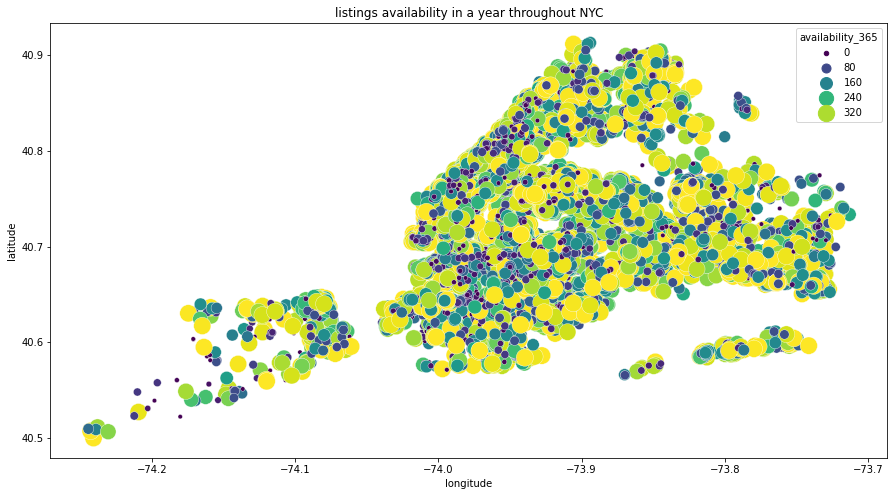

In [ ]:
#  listings availability in a year throughout NYC
f, ax = plt.subplots(figsize=(15, 8))
ax=sns.scatterplot(data=df_airbnb,x='longitude', y='latitude', hue="availability_365",palette="viridis",size='availability_365',
    sizes=(20,300))
ax.set_title('listings availability in a year throughout NYC')

Bronx & Staten Island has listings which are mostly available throughout the year, this might be the case as they are not much costlier as compared to other neighbourhood groups such as in Manhanttan, Brooklyn & Queens.